In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

training_set = train_datagen.flow_from_directory(
    'aug_data/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=True
)

Found 981 images belonging to 7 classes.


In [4]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

testing_set = test_datagen.flow_from_directory(
    'aug_data/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=False
)

Found 242 images belonging to 7 classes.


In [5]:
images, labels = next(training_set)
labels

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

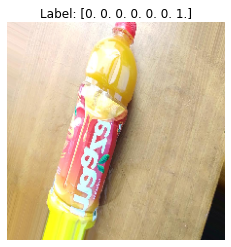

In [6]:
plt.imshow(images[7])
plt.title(f"Label: {labels[0]}")
plt.axis('off')  # Hide the axis
plt.show()

In [7]:
base_model = VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [8]:
print(base_model.output_shape)

(None, 7, 7, 512)


In [9]:
model = Sequential([

    Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),


    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history=model.fit(training_set,epochs=10,validation_data=testing_set)

Train for 31 steps, validate for 8 steps
Epoch 1/10
31/31 [==============================] - 7s 230ms/step - loss: 0.2358 - accuracy: 0.9613 - val_loss: 4.0773 - val_accuracy: 0.6157
Epoch 2/10
31/31 [==============================] - 7s 228ms/step - loss: 0.1566 - accuracy: 0.9725 - val_loss: 2.8439 - val_accuracy: 0.6446
Epoch 3/10
31/31 [==============================] - 7s 223ms/step - loss: 0.2036 - accuracy: 0.9796 - val_loss: 1.7179 - val_accuracy: 0.7273
Epoch 4/10
31/31 [==============================] - 7s 225ms/step - loss: 0.1599 - accuracy: 0.9735 - val_loss: 0.2471 - val_accuracy: 0.9421
Epoch 5/10
31/31 [==============================] - 7s 223ms/step - loss: 0.2322 - accuracy: 0.9806 - val_loss: 0.4449 - val_accuracy: 0.9091
Epoch 6/10
31/31 [==============================] - 7s 225ms/step - loss: 0.1198 - accuracy: 0.9806 - val_loss: 0.5259 - val_accuracy: 0.9132
Epoch 7/10
31/31 [==============================] - 7s 231ms/step - loss: 0.0608 - accuracy: 0.9898 - val_l

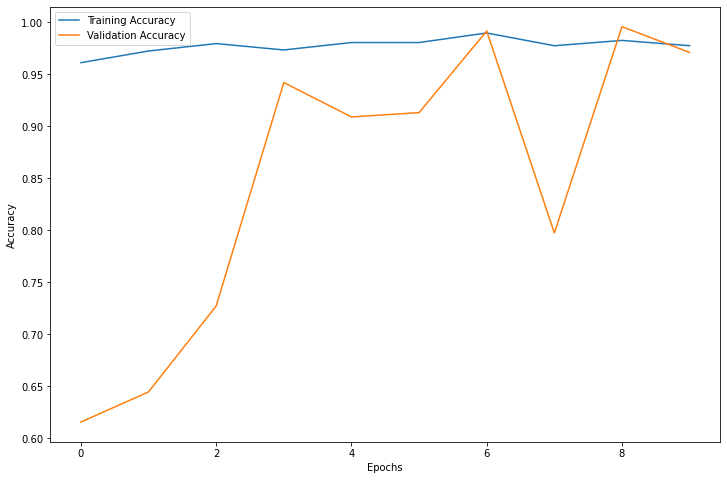

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

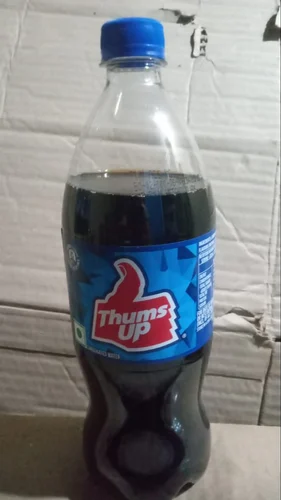

In [124]:
image = Image.open('sample/thums.jpg')

display(image)

In [125]:
test_image = image.resize((224,224))

test_image_arr = np.array(test_image)
if test_image_arr.shape[2] == 4:
    test_image_arr = test_image_arr[:, :, :3]
test_inp=test_image_arr.reshape((1,224,224,3))



# Check the shape of the array
print(test_image_arr.shape)  # This should be (224, 224, 3)


(224, 224, 3)


In [126]:
test_inp = test_inp.astype('float32')  

test_inp /= 255.0 

In [127]:
prediction=model.predict(test_inp)
prediction

array([[2.2873405e-06, 1.9790873e-09, 1.1574174e-07, 9.1855296e-10,
        4.9959440e-06, 9.9999261e-01, 9.7298158e-10]], dtype=float32)

In [128]:
classes=['shampoo','chips','cake','fruit juice','chocolate','soft drinks','biscuit']

In [129]:
predicted_index = np.argmax(prediction)
print(classes[predicted_index])

soft drinks


In [95]:
model.save_weights('custom_model.h5')

In [125]:
model.save('full_model.h5')

In [126]:
from tensorflow.keras.models import load_model
test=load_model('full_model.h5')

In [127]:
prediction=test.predict(test_inp)
predicted_class_index = np.argmax(prediction)

In [128]:
print(predicted_class_index)

6
